# Prosjekt: Euler-Bernoulli Bjelken
***
## Innlevering
En <strong>zip-fil</strong> (ikke tar-fil) som inneholder en rapport skrevet med Jupyter Notebook samt alle produserte filer.
## Euler-Bernoullibjelken
Euler-Bernoullibjelken er en modell for materialer som bøyes under
belastning, inkludert egenvekten av bjelken. Den vertikale
forskyvingen av en $L$ meter lang bjelke beskrives av en funksjon $y(x)$, $0\leq x\leq L$. (**Positiv retning for $y$ er nedover.**)
### Likningen
Forskyvingen $y(x)$ tilfredsstiller Euler-Bernouillilikningen
\begin{equation}
\label{eq:EBE}
EIy''''=f(x)
\end{equation}
der $E$ er en materialkonstant, kalt Youngmodulusen. $I$ er et arealmoment til bjelkens tverrsnitt normalt på lengderetningen. En bjelke kjennetegnes med at $I$ er konstant langs bjelken, (har samme tverrsnitt langs hele bjelken). Høyresiden $f(x)$ er kraft som virker på bjelken per lengde-enhet målt i Newton per meter. Kraften inkluderer vekten til bjelken. Les mer om dette på sidene 102-104 i læreboka. Likning (2.27) kan dere ta for gitt.


### Betingelser på endepunktene
Stupebrettet er festet slik at $y(0)=0$ og $y'(0)=0$. I den frie enden vil $y''(L)=0$ og $y'''(L)=0$.

### Nummerisk beregning av $y''''(x)$.
Funksjonen $y$ kan representeres nummerisk ved å ta verdien i et bestemte punkter, $x_1=h,x_2=2h,\ldots,x_j=j\cdot h, x_n=L=n\cdot h$. Dette er en vektor $[y_1,y_2,\ldots,y_n]^T$, der $y_j\approx y(x_j)$. Dette kalles en diskret tilnærming av $y(x)$.

Det kan vises at $$y''''(x)=\frac{y(x-2h)-4y(x-h)+6y(x)-4y(x+h)+y(x+2h)}{h^4}+O(h^2).$$
Det siste leddet $O(h^2)$ er såkalt stor-O noatsjon og betyr at feilen vil være proposjonal $h^2$ for små verdier av $h$. Det kan vises at hvis $y(x)$ er et polynom av grad 5 eller lavere så er $$y''''(x)=\frac{y(x-2h)-4y(x-h)+6y(x)-4y(x+h)+y(x+2h)}{h^4}.$$ Det kan dere bruke i tolkningen av grafen dere får i oppgave 2.

Euler-Bernoulli likningen på matriseform er gitt ved

$$
\left[\begin{array}{ccccccccc}
16&-9&\frac83&-\frac14\\
-4&6&-4&1\\
1&-4&6&-4&1\\
&1&-4&6&-4&1\\
&&\ddots&\ddots&\ddots&\ddots&\ddots\\
&&&1&-4&6&-4&1\\
&&&&1&-4&6&-4&1\\
&&&&&\frac{16}{17}&-\frac{60}{17}&\frac{72}{17}&-\frac{28}{17}\\
&&&&&-\frac{12}{17}&\frac{96}{17}&-\frac{156}{17}&\frac{72}{17}\\
\end{array}\right]
\left[\begin{array}{c}
y_1\\y_2\\y_3\\y_4\\\vdots\\\vdots\\\vdots\\y_{n-1}\\y_n
\end{array}\right]
=
\frac{h^4}{EI}\left[\begin{array}{c}
f(x_1)\\f(x_2)\\f(x_3)\\f(x_4)\\\vdots\\\vdots\\\vdots\\f(x_{n-1})\\f(x_n)
\end{array}\right]
$$

Matrise-multiplikasjonen $\frac1{h^4}A\mathbf y$ gir en tilnærming av den fjerdederiverte $y''''(x)$. Feilen går som $h^2$. De litt mystiske



### Kode
Dere skal bruke følgende Python kode til å lage matrisen A. Grunnen er at det er mest effektivt å bruke scipy.sparse når vi jobber med tynne matriser i Python.

In [2]:
%matplotlib inline
import numpy as np
import scipy.sparse
import scipy.sparse.linalg

# The following method returns the matrix A used in the exercises.
# The method make_A returns a so called sparse matrix. This is
# a matrix where most of the entries are zero. 
def make_A(n):
    data = np.array([[1,-4,6,-4,1]]).T@np.ones([1,n])   # multi diagonals, @ is 
                                                        #matrix multiplication 
    offset = np.array([-2,-1,0,1,2])                    # diagonal offsets
    A = scipy.sparse.dia_matrix((data,offset),(n,n))    # make sparse multi-diagonal 
                                                        # matrix
    A = A.tolil()  # Transform to a sparse matrix format that is suitable to 
                   #change individual entries.
    A[0,0:4] = np.array([16,-9,8/3,-1/4])               # Set special entries
    A[n-2:n,n-4:n] = np.array([[ 16,-60,  72,-28],      # that do not follow 
                               [-12, 96,-156, 72]])/17  # the 1,-4,6,-4,1 pattern.
    A = A.tocsc()
    return A

# The following method returns the vector on the right hand side of the
# Euler-Bernoulli equation.
def make_F(n):
    L=2;w=0.3;d=0.03                    # Set the dimensions of the beam.
    E=1.3e10;g=9.81;density=480         # Set the physical constants
    h=L/n;                              # Calculate the step length
    I= w * d**3 /12                     # Calculate the momentum of inertia 
    f = -density*w*d*g;                 # Calculate force per meter.
    F = h**4/(E*I)*f*np.ones([n,1])     # Right hand side of the
                                        # Euler-Bernoulli equation.
    return F 

# This function gives the exact solution of the unloaded beam
def y_exact_0(x):
    L = 2; w = 0.3; d = 0.03              # Set the dimensions of the beam.
    E = 1.3e10; g = 9.81; density = 480   # Set the physical constants
    I =  w * d**3 / 12                    # Calculate the momentum of inertia 
    f = -density*w*d*g;                   # Calculate force per meter.
    return (f/(24*E*I))*x*x*(((x-4*L)*x)+6*L**2)

def make_x(n):
    L=2
    h=L/n
    return np.linspace(h,L,n)

# The following method returns the condition number of a sparse matrix A.
# Use this method instead of any built in methods.
def my_cond(S):
    (n,n) = S.shape
    if (n > 10240):
        raise ValueError('The dimension is to high!')
    norm_S = scipy.sparse.linalg.norm(S, np.inf)
    norm_invS = scipy.sparse.linalg.norm(scipy.sparse.linalg.inv(S), np.inf)
    return norm_S*norm_invS


### Oppgave 1.
  **a)** Dere skal vise at likningen $EIy''''=f$ for konstant $f$ har løsning
  $$y(x)=\frac{f}{24EI}x^2(x^2-4Lx+6L^2).$$

  **b)** Vis også at løsningen $y(x)$ over også tilfredstiller betingelsene på endepuntene $x=0$ og $x=L$.

($y(0)=y'(0)=y''(L)=y'''(L)=0$.)
  
  Matrisemultiplikasjonen $\frac{1}{h^4}Ay$ beregner $y''''(x)$ i hvert samplingspunkt der feilen går som $h^2$. Nærmere bestemt kan det vises at feien er mindre eller lik $Ky^{(6)}(x)$, der $K$ er en konstant.
  
  **c)** Hvor stor er feilen $e=|\frac{1}{h^4}Ay-y''''(x)|$, når $y(x)$ er løsningen gitt i oppgave a).

**Dere kan svare på denne oppgaven i denne notebook eller på et eget ark.**

In [3]:
#Skriv kode for oppgave 1 her
from scipy.misc import derivative

#a)
print("a)")
n=10
E=1.3e10;g=9.81;density=480 
w = 0.3; d = 0.03   
L=2
I = w * d**3 / 12
h=L/n
const_f = -1*density*w*d*g
x = make_x(n)
y_prime_4 = ((1/h**4) * make_A(n) * y_exact_0(x))
left = E*I *y_prime_4
right = const_f
for num in left:
    round_amount=5
    right_test = round(right,round_amount)
    left_test = round(num,round_amount)
    print(right_test == left_test)
    print(left_test)
    print(right_test)
    
    
#they are the same down to a rounding of amount 14
print("\n\n")

#b)
y = y_exact_0
y_ = y_exact_0(0)
y_1 = derivative(y, 0, dx=1e-16, n=1)
y_2 = derivative(y, 2, dx=1e-16, n=2)
y_3 = derivative(y, 2, dx=1e-16, n=3, order =5)


print("b)")
print(f"{y_} y(x)")
print(f"{y_1}  y'(x)")
print(f"{y_2}  y''(x)")
print(f"{y_3}  y'''(x)")
print("\n\n")

#c)
print("c)")
x = make_x(n)
print(y_prime_4)
second = derivative(y, x, n=4, order = 5)
print(second)

e = abs(y_prime_4-second)
print(f"e = {e}")

a)
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792
True
-42.3792
-42.3792



b)
-0.0 y(x)
0.0  y'(x)
0.0  y''(x)
0.0  y'''(x)



c)
[-0.00482954 -0.00482954 -0.00482954 -0.00482954 -0.00482954 -0.00482954
 -0.00482954 -0.00482954 -0.00482954 -0.00482954]
[-0.00482954 -0.00482954 -0.00482954 -0.00482954 -0.00482954 -0.00482954
 -0.00482954 -0.00482954 -0.00482954 -0.00482954]
e = [4.42354486e-16 1.33747180e-15 1.76594850e-15 2.22911967e-15
 1.34614542e-15 1.80064297e-15 2.64718802e-15 5.34641775e-15
 2.64718802e-15 6.24153507e-15]


Fra svaret i oppgave 1 har dere en eksakt løsning på randverdiproblemet for stupebrettets form. Denne skal dere bruke i neste oppgave.

### Oppgave 2
I denne oppgaven skal dere løse matriselikningen i seksjonen om Nummerisk beregning av $y''''(x)$. 

**a)** Løs $Ay=b$, der A er matrisen over og $b$ er høyresiden. Dere kan bruke koden som dere finner i seksjonen **Kode**. (NB: Bruk scipy.sparse.linalg.spsolve(A,b) for å løse systemet Ax=b.)

**b)** Plot resultatet i et aksesystem. Dere vil få bruk for Python-funksjonen **plot** i biblioteket **matplotlib.pyplot**.

(Tips: pyplot.plot(x,y) tar endimensjonale arrays som argumenter. De må ha samme antall elementer. Resultatet blir en kurve gjennom punktene (x[0],y[0]), (x[1],y[1]), etc.)

**c)** Plot også den eksakte løsningen fra oppgave 1 i det samme koordinatsystemet.

(Hint: Dere kan bruke funksjonen y_exact(x) og make_x(n). Python aritmetikk virker direkte på numpy- og scipy-arrays. Kall plot() en gang til. Bruk plt.figure(1) og plt.figure(2) for å tegne figurer i to forskjellige aksesystem. Uten det blir begge figurer tegnet i samme aksekors. Om du har regnet riktig så skal du da se kun en kurve. Test gjerne ut _plt.legend_(["tekst1","tekst2"]), _plt.title_("tekst"), _plt.xlabel_("tekst") og
_plt.ylabel_("tekst") for å gi navn på akser og så videre.)

[-0.00101873 -0.00342092 -0.00645196 -0.00965908]


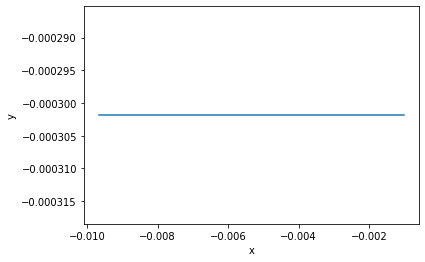

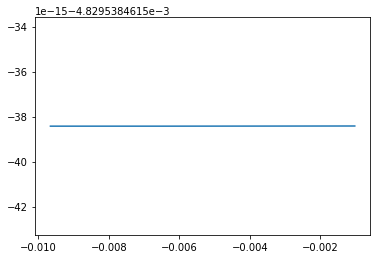

In [4]:
#Skriv kode for oppgave 2 her
import matplotlib.pyplot as plt

# a)
n= 4
A = make_A(n)
b = make_F(n)
x = np.array(scipy.sparse.linalg.spsolve(A,b))
print(x)


# b)
plt.plot(x, b, '-')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

# c)
exact = derivative(y, x, n=4, order = 5)

plt.plot(x, exact, '-')
plt.show()

### Oppgave 3

**a)** Løs systemet $Ay=b$ med følgende verdier av n: $n=20,40,80,\ldots,10\cdot 2^9$.

**b)** Regn ut relative feilene i endepunktet $x=2$. Disse kan leses av ved å bruke Python-notasjonen y[-1] for hver løsning dere får for de forskjellige verdiene av _n_. Dere skal sammenligne denne med den eksakte verdien som dere får ved å skrive y_exact(2).

**c)** Presenter resultatet i en tabell og i en graf. Dere bør plotte absolutverdien til feilen. Bruk funksjonen plt.loglog() for å få logaritmisk skala på begge akser. Diskuter hvordan dette resultatet passer med at feilen i de nummeriske formlene skal gå som $h^2$.

**d)** Regn ut kondisjonstallet multiplisert med $\epsilon_{Mach}$ til $A$ for de 7 første vardiene av $n$ tegn. Plot resultatet sammen med feilen i oppgave **c)**. Forklar sammenhengen mellom grafen til kondisjonstallet og grafen for absolutt feil. Bruk det dere har lært om kondisjonstall i forklaringen.

5.533767888366015e-15
1.979456529244139e-12
1.381841689684915e-11
2.9348002500428905e-10
5.850543365742977e-10
6.915120793690721e-09
2.959371020044843e-07
3.8339869415371375e-07
5.040394692242857e-05


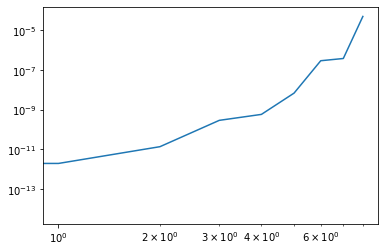

In [5]:
#Skriv kode for oppgave 3 her

errors = []
n = 20
while n <= 10*2**9:
    n = n * 2
    A = make_A(n)
    b = make_F(n)
    y = np.array(scipy.sparse.linalg.spsolve(A,b))

    # a) (Commented out as the output is quite large)
    # print(y)

    # b)
    error = abs(y[-1] - y_exact_0(2))
    errors.append(error)
    print(error)
    
# c)

plt.loglog(errors)
plt.show()

# At feilen øker når `n` går opp er helt naturlig siden h^2 også øker når graden øker

# d)

### Oppgave 4
I denne oppgaven skal dere legge til en sinusformet haug på stupebrettet. Det gjøres ved å legge til en funksjon $s(x)=pg\sin\frac{\pi}{L}x$ til kraftenleddet $f(x)$. Dere vil få bruk for følgende kode.

In [6]:
# The following method returns the vector on the right hand side of the
# Euler-Bernoulli equation for the beam loaded with a sinus formed pile.
def make_F_1(n):
    L=2;w=0.3;d=0.03                    # Set the dimensions of the beam.
    E=1.3e10;g=9.81;density=480;p=100   # Set the physical constants
    h=L/n;                              # Calculate the step length
    I= w * d**3 /12                     # Calculate the momentum of inertia 
    f=-density*w*d*g*np.ones([n,1]);    # Calculate force per meter for the empty beam.
    x=np.linspace(h,L,n).reshape([n,1]);
    s=-p*g*np.sin(np.pi/L*x)            # Calculate force per meter caused by the pile.
    return h**4/(E*I)*(s+f)             # Right hand side of the Euler-Bernoulli equation.

# This function gives the exact solution of the unloaded beam
def y_exact_1(x):
    L=2;w=0.3;d=0.03                    # Set the dimensions of the beam.
    E=1.3e10;g=9.81;density=480;p=100   # Set the physical constants
    I= w * d**3 /12                     # Calculate the momentum of inertia 
    y_ex_0=y_exact_0(x)
    pi = np.pi;
    return y_ex_0-p*g*L/(E*I*pi)*(L**3/pi**3*np.sin(pi/L*x)-x**3/6+L/2*x**2-L**2/pi**2*x)

**a)** Skriv et Python program der dere løser Euler-Bernoulli med haugen som ekstra belastning.

**b)** Lag et Python program som tegner løsningen fra a) sammen med eksakt løsning.

**c)** Gjenta 3a) for situasjonen i denne oppgaven (sinusformet haug).

**d)** Regn ut relative feilene i endepunktet $x=2$. Disse kan leses av ved å bruke Python-notasjonen y[-1] for hver løsning dere får for de forskjellige verdiene av _n_ i punkt _c)_. Dere skal sammenligne denne med den eksakte verdien som dere får ved å skrive y_exact_1(2).

**e)** Presenter resultatet i en tabell og i en graf. Dere bør plotte absolutverdien til feilen. Bruk funksjonen plt.loglog() for å få logaritmisk skala på begge akser. Diskuter hvordan dette resultatet passer med at feilen i de nummeriske formlene skal gå som $h^2$. (plot også $n^{-2}\sim h^2$ i samme graf). Plot også grafene fra _3d)_ i samme koordinatsystem.

**f)** Diskuter resultatet du fikk i _e)_ 


In [7]:
#Skriv kode for oppgave 4 her